# Cat-Not Cat Recognition using CNN 

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense
import h5py
import random
import tensorflow as tf


In [322]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

Importing the Dataset

In [323]:
#Defining the file paths

train_file_path=r'C:\Users\Sahil\Desktop\Catnoncat\catvnoncat\train_catvnoncat.h5' 

test_file_path = r'C:\Users\Sahil\Desktop\Catnoncat\catvnoncat\test_catvnoncat.h5'

In [324]:
dict = { 
 'name' : ['sail' , 'salina']
}

In [325]:
dict['name'][:]

['sail', 'salina']

In [326]:
#Loading the dataset

with h5py.File(train_file_path , 'r') as train_file:
 print('The Keys in the training file is:' , list(train_file.keys()))
 print(train_file['list_classes'][:])
 train_x = train_file['train_set_x'][:]
 train_y = train_file['train_set_y'][:]


with h5py.File(test_file_path , 'r') as test_file:
 print('The Keys in the training file is:' , list(test_file.keys()))
 test_x = test_file['test_set_x'][:]
 test_y = test_file['test_set_y'][:]
 classes = test_file['list_classes'][:]

The Keys in the training file is: ['list_classes', 'train_set_x', 'train_set_y']
[b'non-cat' b'cat']
The Keys in the training file is: ['list_classes', 'test_set_x', 'test_set_y']


In [327]:
# Analyzing the shapes

print('------------Before Reshape-----------')

print('The shape of X_train is:' , train_x.shape)
print('The shape of Y_train is:' , train_y.shape)
print('The shape of X_test is:' , test_x.shape)
print('The shape of Y_test is:' , test_y.shape)

train_y = train_y.reshape(len(train_y) , 1)
test_y = test_y.reshape(len(test_y) , 1)

print('')

print('------------After Reshape-----------')
print('The shape of X_train is:' , train_x.shape)
print('The shape of Y_train is:' , train_y.shape)
print('The shape of X_test is:' , test_x.shape)
print('The shape of Y_test is:' , test_y.shape)

print(classes[1].decode('utf=8'))


------------Before Reshape-----------
The shape of X_train is: (209, 64, 64, 3)
The shape of Y_train is: (209,)
The shape of X_test is: (50, 64, 64, 3)
The shape of Y_test is: (50,)

------------After Reshape-----------
The shape of X_train is: (209, 64, 64, 3)
The shape of Y_train is: (209, 1)
The shape of X_test is: (50, 64, 64, 3)
The shape of Y_test is: (50, 1)
cat


In [328]:
# Normalizing the values

train_x = train_x / 255.0
test_x = test_x / 255.0

In [329]:
train_x[0].shape

(64, 64, 3)

Loading Train Image

In [330]:
np.squeeze(train_y[10])

array(0, dtype=int64)

This picture has the label [1] which means that it is: cat


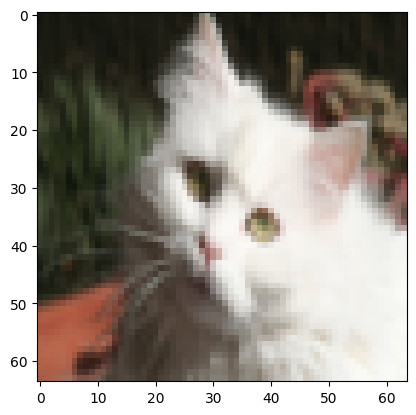

In [331]:
img_idx = np.random.randint( 0 , len(train_x))

plt.imshow(train_x[img_idx])

print('This picture has the label' , train_y[img_idx] , 'which means that it is:' , classes[np.squeeze(train_y[img_idx])].decode('utf-8'))

Model Development

In [332]:
CNN_model = Sequential([

Conv2D(64 , (3,3) , activation='relu' , input_shape = (64 , 64 , 3)),
MaxPool2D((2,2)),

Conv2D(64 , (3,3) , activation='relu'),
MaxPool2D((2,2)),

# Conv2D(64 , (3,3) , activation='relu'),
# MaxPool2D((2,2)),

Flatten(),
Dense(64 , activation='relu'),
Dense(128 , activation= 'relu'),
Dense(1 , activation= 'sigmoid')

])

In [333]:
CNN_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 850,049 (3.24 MB)

 Trainable params: 850,049 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

In [334]:
CNN_model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics = ['accuracy'])

CNN_model_history = CNN_model.fit(train_x , train_y , epochs= 12 , batch_size= 15 , validation_split=0.2)

Epoch 1/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6163 - loss: 0.6908 - val_accuracy: 0.7143 - val_loss: 0.5543
Epoch 2/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6163 - loss: 0.5883 - val_accuracy: 0.7143 - val_loss: 0.5060
Epoch 3/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6757 - loss: 0.5428 - val_accuracy: 0.7143 - val_loss: 0.4857
Epoch 4/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7403 - loss: 0.4946 - val_accuracy: 0.7143 - val_loss: 0.6498
Epoch 5/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7529 - loss: 0.5202 - val_accuracy: 0.7143 - val_loss: 0.6830
Epoch 6/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7374 - loss: 0.5075 - val_accuracy: 0.7143 - val_loss: 0.7597
Epoch 7/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7427 - loss: 0.4858 - val_accuracy: 0.7143 - val_loss: 0.9120
Epoch 8/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7611 - loss: 0.5054 - val_accuracy: 0.6905 - v

In [335]:
model_score = CNN_model.evaluate(test_x , test_y , verbose= 1)  

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7908 - loss: 0.4719


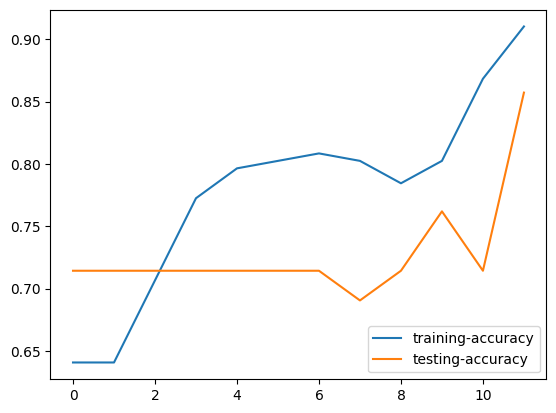

In [336]:
plt.plot(CNN_model_history.history['accuracy'] , label = 'training-accuracy')
plt.plot(CNN_model_history.history['val_accuracy'] , label = 'testing-accuracy')
plt.legend(loc = 'lower right')

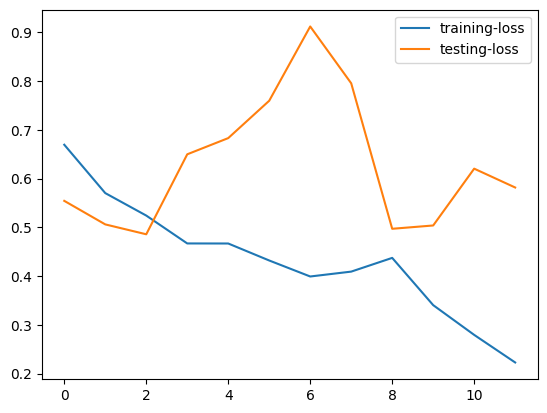

In [337]:
plt.plot(CNN_model_history.history['loss'] , label = 'training-loss')
plt.plot(CNN_model_history.history['val_loss'] , label = 'testing-loss')
plt.legend(loc = 'upper right')

Testing on Test Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The image shows a Cat


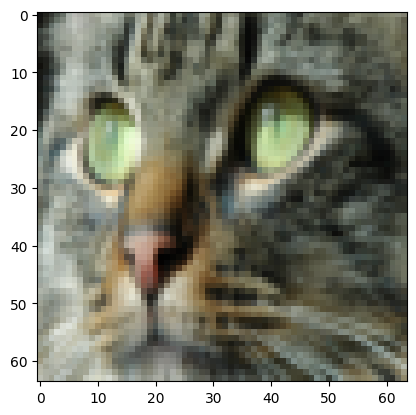

In [366]:
test_indx =np.random.randint( 0 , len(test_x))

plt.imshow(test_x[test_indx])

prediction = CNN_model.predict(test_x[test_indx].reshape(1 , 64 , 64 , 3))

prediction = prediction > 0.5

if prediction == True:

 print("The image shows a Cat")

else:

 print("The image does not show a cat")